<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
## from github
url = "https://raw.githubusercontent.com/Geez-l/Project_197/glee-branch/dataset/dataset.csv"
dataset = pd.read_csv(url)

dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [70]:
dataset.columns

Index(['Date', 'Croptype', 'Province', 'Area', 'Production', 'Yield'], dtype='object')

In [71]:
dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


Create features


In [72]:
def create_features(dataset):
    # Create a copy to avoid modifying the original dataset
    dataset = dataset.copy()

    # Convert 'Date' column to datetime, coercing errors to NaT (Not a Time)
    dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

    # Extract year, month, quarter from Date
    dataset['Year'] = dataset['Date'].dt.year
    dataset['Month'] = dataset['Date'].dt.month
    dataset['Quarter'] = dataset['Date'].dt.quarter

    return dataset

# Apply the feature creation function
dataset = create_features(dataset)

# Display the first few rows to check
dataset.head()


,Date,Croptype,Province,Area,Production,Yield,Year,Month,Quarter
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918,1987,1,1
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229,1987,1,1
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857,1987,1,1
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857,1987,1,1
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637,1987,1,1


One hot encoding for categorical variable

In [73]:
dataset = pd.get_dummies(dataset, columns=['Croptype', 'Province'], drop_first=True)

In [74]:
dataset = dataset.sort_values('Date')

In [75]:
dataset.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo
0,1987-01-01,6130.0,19309.0,3.149918,1987,1,1,True,False,False,False,False,False,False,False,False
29,1987-01-01,7160.0,4136.0,0.577654,1987,1,1,False,False,False,False,False,False,False,False,True
28,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,False,True,False
27,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,True,False,False
26,1987-01-01,240.0,37.0,0.154167,1987,1,1,False,False,False,False,False,True,False,False,False


In [76]:
dataset['Yield_Lag1'] = dataset['Yield'].shift(1)

In [77]:
dataset = dataset.dropna()

In [78]:
x = dataset[['Area', 'Production', 'Year', 'Month', 'Quarter'] + [col for col in dataset.columns if 'Croptype' in col or 'Province' in col] + ['Yield_Lag1']]
y = dataset['Yield']

Split the data

In [79]:
from sklearn.model_selection import train_test_split

# Train-test split without shuffling (important for time series)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)


In [80]:
dataset.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1
29,1987-01-01,7160.0,4136.0,0.577654,1987,1,1,False,False,False,False,False,False,False,False,True,3.149918
28,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,False,True,False,0.577654
27,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,True,False,False,1.294350
26,1987-01-01,240.0,37.0,0.154167,1987,1,1,False,False,False,False,False,True,False,False,False,1.294350
25,1987-01-01,80.0,47.0,0.587500,1987,1,1,False,False,False,False,False,False,False,False,False,0.154167


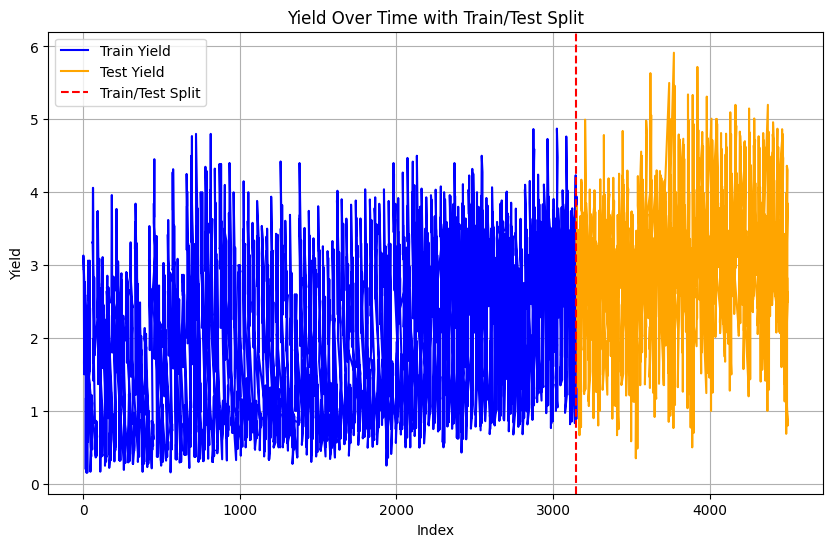

In [99]:
import matplotlib.pyplot as plt

# Calculate the indices for the split point
split_index = len(x_train)

# Plot the training data
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Train Yield', color='blue')

# Plot the test data
plt.plot(y_test.index, y_test.values, label='Test Yield', color='orange')

# Add a vertical line for the train/test split
plt.axvline(x=split_index, color='red', linestyle='--', label='Train/Test Split')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Yield')
plt.title('Yield Over Time with Train/Test Split')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [81]:
dataset_test = x_test.copy()

In [82]:
dataset_test['Actual_Yield'] = y_test.values

# Linear Regression

In [83]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform on training data
x_test_scaled = scaler.transform(x_test)        # Only transform test data

In [84]:
# Initializing and fitting the model
linearRegression = LinearRegression()
linearRegression.fit(x_train_scaled, y_train)

LinearRegression()

In [85]:
# Evaluate the model on the test set
y_pred = linearRegression.predict(x_test_scaled)

In [86]:
# Cross-validation (using Linear Regression)
cv_scores = cross_val_score(linearRegression, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV

# Print Cross-validation Mean MSE
print(f"Cross-validation Mean MSE: {-cv_scores.mean()}")

Cross-validation Mean MSE: 0.4547712691772804


# Prediction

In [88]:
# Predictions for Yield using Linear Regression
pred_linearReg_yield = linearRegression.predict(x_test_scaled)

# Add predictions to the dataset_test dataframe
dataset_test["Linear Regression Yield Predictions"] = pred_linearReg_yield


In [89]:
dataset_test.head()

,Area,Production,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1,Actual_Yield,Linear Regression Yield Predictions
3171,674.0,2317.0,2013,4,2,False,False,False,False,True,True,False,False,False,2.890364,3.437685,2.032645
3167,60.0,109.0,2013,4,2,False,False,False,True,False,False,True,False,False,3.437685,1.816667,1.716542
3168,6.0,4.0,2013,4,2,False,False,False,True,False,False,False,True,False,1.816667,0.666667,1.321321
3169,3500.0,8180.0,2013,4,2,False,False,False,True,False,False,False,False,True,0.666667,2.337143,1.540223
3170,345.0,1070.0,2013,4,2,False,False,False,False,True,False,False,False,False,2.337143,3.101449,1.975724


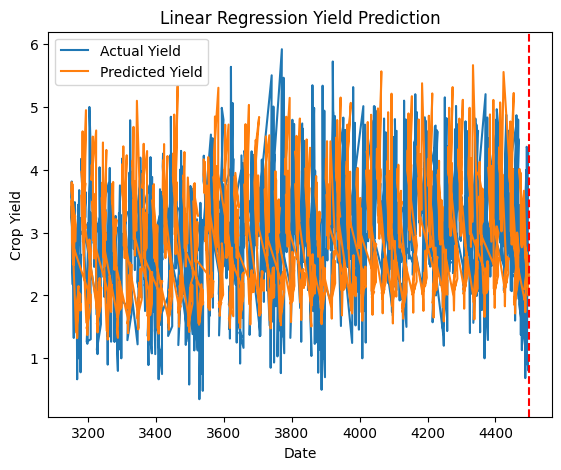

In [92]:
# Data Visualization
ax = dataset_test['Actual_Yield'].plot(figsize=(6.5, 5), label="Actual Yield")
dataset_test["Linear Regression Yield Predictions"].plot(ax=ax, label="Predicted Yield")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')  # Add a line to indicate the split (last data point)

plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.title("Linear Regression Yield Prediction")
plt.legend(loc="upper left")
plt.show()


#Evaluation Metrics

RMSE

In [90]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.0031002248201406


MAPE

In [91]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')


Mean Absolute Percentage Error: 0.2649366294081772


In [97]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.0062100610342166
R-squared: -0.16412576592070782


# SVR

In [93]:
SVR_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
SVR_model.fit(x_train_scaled, y_train)


SVR(C=100, gamma=0.1)

In [94]:
# Predictions for Yield using SVR
pred_svr_yield = SVR_model.predict(x_test_scaled)

# Add predictions to the dataset_test dataframe
dataset_test["SVR Yield Predictions"] = pred_svr_yield

dataset_test.head()


,Area,Production,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1,Actual_Yield,Linear Regression Yield Predictions,SVR Yield Predictions
3171,674.0,2317.0,2013,4,2,False,False,False,False,True,True,False,False,False,2.890364,3.437685,2.032645,3.233651
3167,60.0,109.0,2013,4,2,False,False,False,True,False,False,True,False,False,3.437685,1.816667,1.716542,1.648175
3168,6.0,4.0,2013,4,2,False,False,False,True,False,False,False,True,False,1.816667,0.666667,1.321321,1.351896
3169,3500.0,8180.0,2013,4,2,False,False,False,True,False,False,False,False,True,0.666667,2.337143,1.540223,2.404786
3170,345.0,1070.0,2013,4,2,False,False,False,False,True,False,False,False,False,2.337143,3.101449,1.975724,2.471886


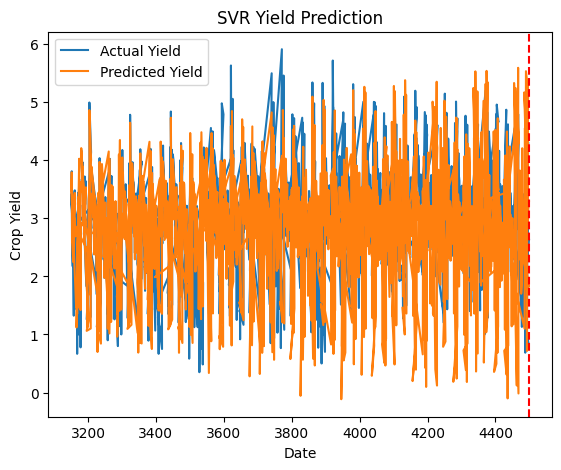

In [95]:
# Data Visualization
ax = dataset_test['Actual_Yield'].plot(figsize=(6.5, 5), label="Actual Yield")
dataset_test["SVR Yield Predictions"].plot(ax=ax, label="Predicted Yield")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')  # Add a line to indicate the split (last data point)

plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.title("SVR Yield Prediction")
plt.legend(loc="upper left")
plt.show()


# Evaluation Metrics

In [96]:
# Evaluation Metrics for SVR
# MSE and R-squared
mse_svr = mean_squared_error(y_test, pred_svr_yield)
r2_svr = r2_score(y_test, pred_svr_yield)
print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R-squared (SVR): {r2_svr}')

# RMSE
rmse_svr = np.sqrt(mse_svr)
print(f'Root Mean Squared Error (SVR): {rmse_svr}')

# MAPE
mape_svr = mean_absolute_percentage_error(y_test, pred_svr_yield)
print(f'Mean Absolute Percentage Error (SVR): {mape_svr}')

Mean Squared Error (SVR): 0.917621972225482
R-squared (SVR): -0.06163456579305082
Root Mean Squared Error (SVR): 0.9579258699009449
Mean Absolute Percentage Error (SVR): 0.26215079840645955


Random Forest

In [100]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
# Predictions for Yield using Random Forest
pred_rf_yield = rf_model.predict(x_test)

# Add predictions to the dataset_test dataframe
dataset_test["Random Forest Yield Predictions"] = pred_rf_yield

dataset_test.head()

,Area,Production,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1,Actual_Yield,Linear Regression Yield Predictions,SVR Yield Predictions,Random Forest Yield Predictions
3171,674.0,2317.0,2013,4,2,False,False,False,False,True,True,False,False,False,2.890364,3.437685,2.032645,3.233651,2.893337
3167,60.0,109.0,2013,4,2,False,False,False,True,False,False,True,False,False,3.437685,1.816667,1.716542,1.648175,1.726915
3168,6.0,4.0,2013,4,2,False,False,False,True,False,False,False,True,False,1.816667,0.666667,1.321321,1.351896,1.146138
3169,3500.0,8180.0,2013,4,2,False,False,False,True,False,False,False,False,True,0.666667,2.337143,1.540223,2.404786,2.259202
3170,345.0,1070.0,2013,4,2,False,False,False,False,True,False,False,False,False,2.337143,3.101449,1.975724,2.471886,3.075730


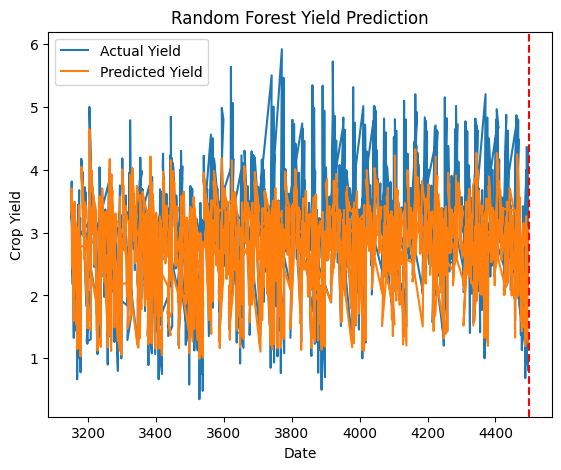

In [102]:
# Data Visualization
ax = dataset_test['Actual_Yield'].plot(figsize=(6.5, 5), label="Actual Yield")
dataset_test["Random Forest Yield Predictions"].plot(ax=ax, label="Predicted Yield")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')  # Add a line to indicate the split (last data point)

plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.title("Random Forest Yield Prediction")
plt.legend(loc="upper left")
plt.show()


Evaluation Metrics for Random Forest

In [104]:

# Evaluation Metrics for Random Forest
# MSE and R-squared
mse_rf = mean_squared_error(y_test, pred_rf_yield)
r2_rf = r2_score(y_test, pred_rf_yield)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

# RMSE
rmse_rf = np.sqrt(mse_rf)
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')

# MAPE
mape_rf = mean_absolute_percentage_error(y_test, pred_rf_yield)
print(f'Mean Absolute Percentage Error (Random Forest): {mape_rf}')

Mean Squared Error (Random Forest): 0.30963585677831124
R-squared (Random Forest): 0.641769554005375
Root Mean Squared Error (Random Forest): 0.5564493299288905
Mean Absolute Percentage Error (Random Forest): 0.12528472988366288


#XGBoost

In [106]:
XGB_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
XGB_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [109]:
# Predictions for Yield using XGBoost
pred_xgb_yield = XGB_model.predict(x_test)

# Add predictions to the dataset_test dataframe
dataset_test["XGB Yield Predictions"] = pred_xgb_yield

dataset_test.head()

,Area,Production,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1,Actual_Yield,Linear Regression Yield Predictions,SVR Yield Predictions,Random Forest Yield Predictions,XGB Yield Predictions
3171,674.0,2317.0,2013,4,2,False,False,False,False,True,True,False,False,False,2.890364,3.437685,2.032645,3.233651,2.985947,2.985947
3167,60.0,109.0,2013,4,2,False,False,False,True,False,False,True,False,False,3.437685,1.816667,1.716542,1.648175,1.753665,1.753665
3168,6.0,4.0,2013,4,2,False,False,False,True,False,False,False,True,False,1.816667,0.666667,1.321321,1.351896,0.878683,0.878683
3169,3500.0,8180.0,2013,4,2,False,False,False,True,False,False,False,False,True,0.666667,2.337143,1.540223,2.404786,2.266067,2.266067
3170,345.0,1070.0,2013,4,2,False,False,False,False,True,False,False,False,False,2.337143,3.101449,1.975724,2.471886,3.361153,3.361153


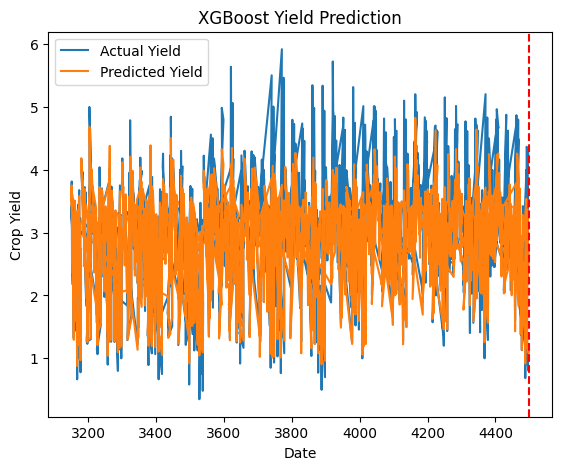

In [110]:

# Data Visualization for XGBoost
ax = dataset_test['Actual_Yield'].plot(figsize=(6.5, 5), label="Actual Yield")
dataset_test["XGB Yield Predictions"].plot(ax=ax, label="Predicted Yield")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')  # Add a line to indicate the split (last data point)

plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.title("XGBoost Yield Prediction")
plt.legend(loc="upper left")
plt.show()



#Evaluation metrics

In [111]:
# Evaluation Metrics for XGBoost
# MSE and R-squared
mse_xgb = mean_squared_error(y_test, pred_xgb_yield)
r2_xgb = r2_score(y_test, pred_xgb_yield)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

# RMSE
rmse_xgb = np.sqrt(mse_xgb)
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')

# MAPE
mape_xgb = mean_absolute_percentage_error(y_test, pred_xgb_yield)
print(f'Mean Absolute Percentage Error (XGBoost): {mape_xgb}')

Mean Squared Error (XGBoost): 0.16999593033474153
R-squared (XGBoost): 0.803324722870561
Root Mean Squared Error (XGBoost): 0.41230562733819376
Mean Absolute Percentage Error (XGBoost): 0.09174785583316261
